<a href="https://colab.research.google.com/github/smyousuf14/MNIST-Dataset-Deep-Learning-with-Keras/blob/master/mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Neccessary imports
import tensorflow as tn
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils

In [3]:
#Data cleaning and preprocessing
num_classes = 10
epouch = 10
batch_size = 256

#Now import the mnist data
mnist_data = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

num_training_samples = x_train.shape[0]
num_testing_samples = x_test.shape[0]

# reshape 
x_train = x_train.reshape(num_training_samples, 28, 28, 1)
x_test = x_test.reshape(num_testing_samples, 28, 28, 1)

# Normalize the data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

#one hot encode labels
y_train_one_hot = utils.to_categorical(y_train)
y_test_one_hot = utils.to_categorical(y_test)



11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# build the model
model_best = models.Sequential([
    layers.Conv2D(120, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

model = models.Sequential([
    layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
#Train the model
history = model.fit(x_train_normalized, y_train_one_hot, batch_size = batch_size, epochs = epouch, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 178us/sample - loss: 0.3073 - acc: 0.9001 - val_loss: 0.0569 - val_acc: 0.9838
Epoch 2/10
54000/54000 [==============================] - 6s 111us/sample - loss: 0.0689 - acc: 0.9784 - val_loss: 0.0409 - val_acc: 0.9888
Epoch 3/10
54000/54000 [==============================] - 6s 110us/sample - loss: 0.0486 - acc: 0.9842 - val_loss: 0.0390 - val_acc: 0.9890
Epoch 4/10
54000/54000 [==============================] - 6s 110us/sample - loss: 0.0376 - acc: 0.9877 - val_loss: 0.0297 - val_acc: 0.9912
Epoch 5/10
54000/54000 [==============================] - 6s 110us/sample - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0289 - val_acc: 0.9918
Epoch 6/10
54000/54000 [==============================] - 6s 109us/sample - loss: 0.0268 - acc: 0.9911 - val_loss: 0.0266 - val_acc: 0.9925
Epoch 7/10
54000/54000 [==============================] - 6s 109us/sample - loss: 0.0250 - acc: 0.9920 - val_l

In [0]:
loss = history.history["loss"]
acc = history.history["acc"] 

val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

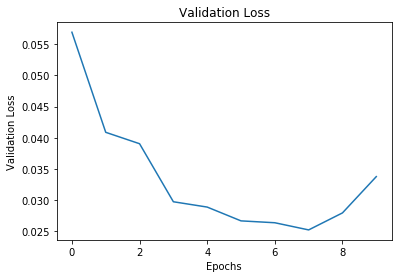

In [13]:
#plot the results
plt.plot(range(epouch), val_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss")
plt.show()

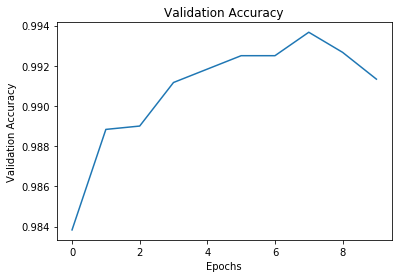

In [14]:
plt.plot(range(epouch), val_acc)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

In [15]:
print("Validation Accuracy: ", max(val_acc))

Validation Accuracy:  0.99366665


In [16]:
results = model.evaluate(x_test_normalized, y_test_one_hot)

10000/10000 [==============================] - 2s 160us/sample - loss: 0.0228 - acc: 0.9936
